<a href="https://colab.research.google.com/github/salsabilaputrikamila/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


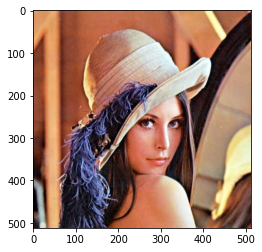

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Foto/lena.jpg')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


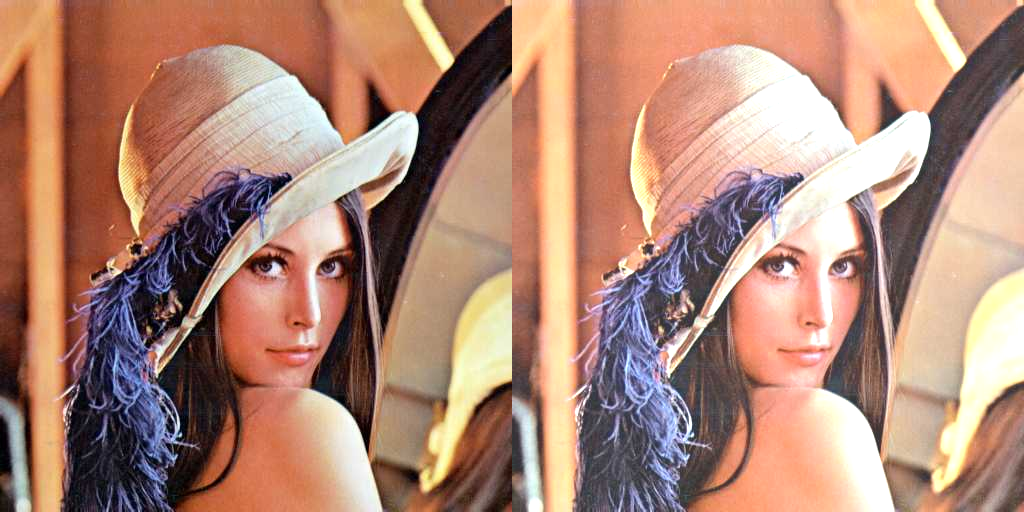

In [6]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Foto/lena.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Mengubah kontrass dan tingkat kecerahan citra
---------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 60
Masukkan nilai kontras (1.0 - 3.0) : 1.5


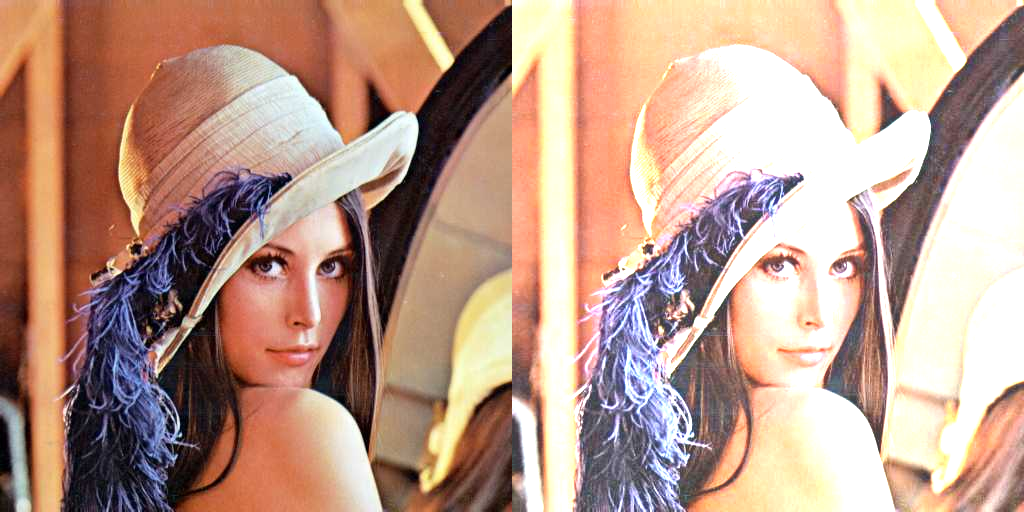

In [8]:
#tugas praktikum 1: Implementasi transformasi contrast
print('Mengubah kontrass dan tingkat kecerahan citra')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contras = float(input('Masukkan nilai kontras (1.0 - 3.0) : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Foto/lena.jpg')
bc_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      bc_image[y,x,c] = np.clip(contras*original[y,x,c] + brightness, 0, 255)

#simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, bc_image))
cv2_imshow(final_frame)

Mengubah tingkat kecerahan citra dengan transformasi logarithmic brightness
------------------------------------------------
Masukkan nilai kecerahan : 40


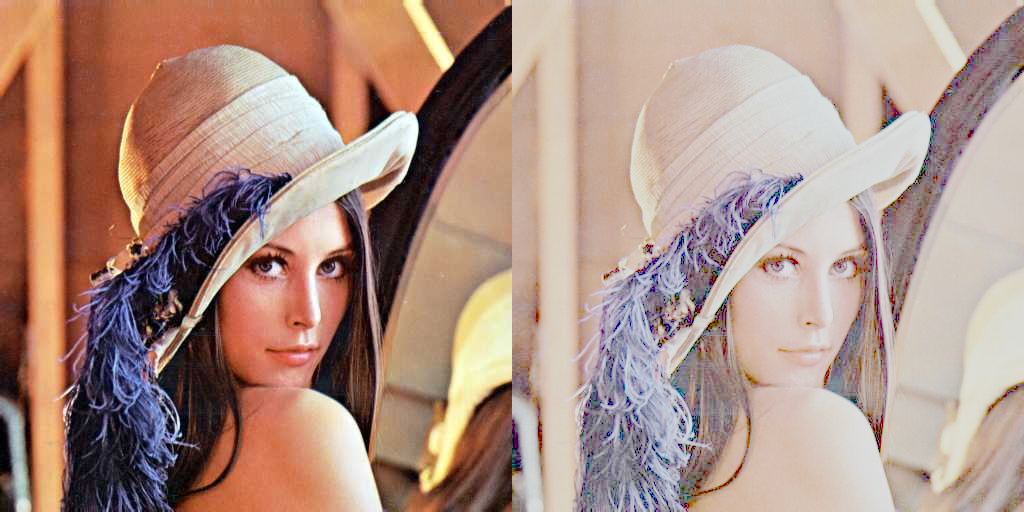

In [9]:
#tugas praktikum 2 : implementasi transformasi logarithmic brightness
print('Mengubah tingkat kecerahan citra dengan transformasi logarithmic brightness')
print('------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Foto/lena.jpg')
b_image = np.zeros(original.shape, original.dtype)

#akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      b_image[y,x,c] = np.clip(brightness*(np.log(1 + original[y,x,c])),0,255)

#simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, b_image))
cv2_imshow(final_frame)

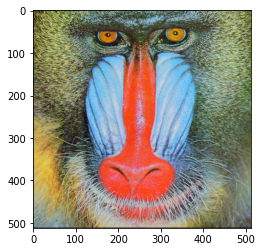

In [10]:
#tugas praktikum 3: Implementasi transformasi grayscale
img = cv.imread('/content/drive/MyDrive/Foto/mandrill.tiff')
img_color = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img_color)

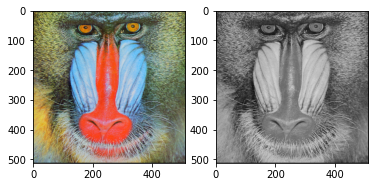

In [11]:
#3A(Averaging) tugas praktikum 3: Implementasi transformasi grayscale
img_avg = cv.imread('/content/drive/MyDrive/Foto/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_color)
ax[1].imshow(img_avg)

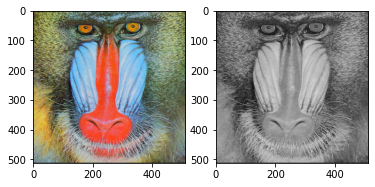

In [12]:
#3B(Lightness) tugas praktikum 3: Implementasi transformasi grayscale
img_light = cv.imread('/content/drive/MyDrive/Foto/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_color)
ax[1].imshow(img_light)

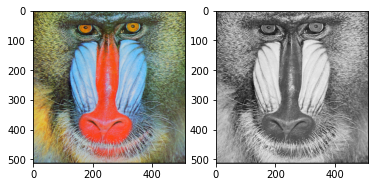

In [27]:
#3C(Luminance) tugas praktikum 3: Implementasi transformasi grayscale
img_lumin = cv.imread('/content/drive/MyDrive/Foto/mandrill.tiff')
R, G, B = img_lumin[:,:,0], img_lumin[:,:,1], img_lumin[:,:,2]

gray_lumin = (0.21 *R) + (0.72 *G) + (0.07 *B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_color)
ax[1].imshow(gray_lumin, cmap='gray')

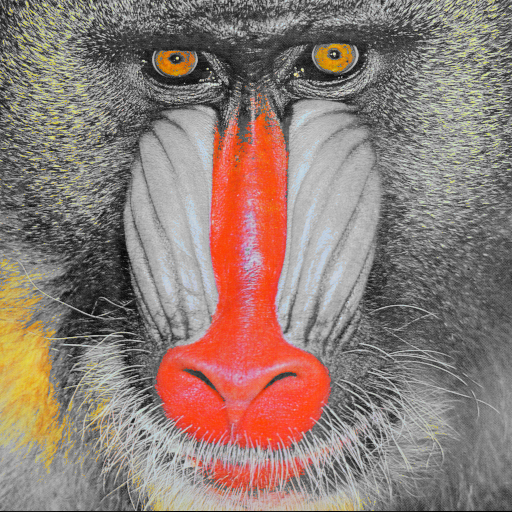

In [35]:
#tugas praktikum 4 : Tampilkanlah warna tertentu pada citra
img_4 = cv.imread('/content/drive/MyDrive/Foto/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_4, mask3)
gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

hasil = gray + red
cv2_imshow(hasil)